In [1]:
# importing all necessary libraries
import numpy as np
import pandas as pd

#for data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

#for missing values
import missingno as mno

#for daytime manipulation
import datetime

#for interactivity
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

#setting up backround for the plots
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset
# begin the data and also checking the time
%time data = pd.read_csv('data-1.csv')
data.shape

CPU times: total: 172 ms
Wall time: 314 ms


(18207, 89)

In [3]:
print(data.columns)

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [4]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [5]:
print(data.iloc[:,40:].isna().sum())
# to know the the total null value in row

LCM                2085
CM                 2085
RCM                2085
RM                 2085
LWB                2085
LDM                2085
CDM                2085
RDM                2085
RWB                2085
LB                 2085
LCB                2085
CB                 2085
RCB                2085
RB                 2085
Crossing             48
Finishing            48
HeadingAccuracy      48
ShortPassing         48
Volleys              48
Dribbling            48
Curve                48
FKAccuracy           48
LongPassing          48
BallControl          48
Acceleration         48
SprintSpeed          48
Agility              48
Reactions            48
Balance              48
ShotPower            48
Jumping              48
Stamina              48
Strength             48
LongShots            48
Aggression           48
Interceptions        48
Positioning          48
Vision               48
Penalties            48
Composure            48
Marking              48
StandingTackle  

In [6]:
print(data.iloc[:,:40].isna().sum())

Unnamed: 0                      0
ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Real Face                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
LS                           2085
ST            

In [7]:
#pd.set_option('max_columns',100)
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [8]:
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


<AxesSubplot:xlabel='Age', ylabel='count'>

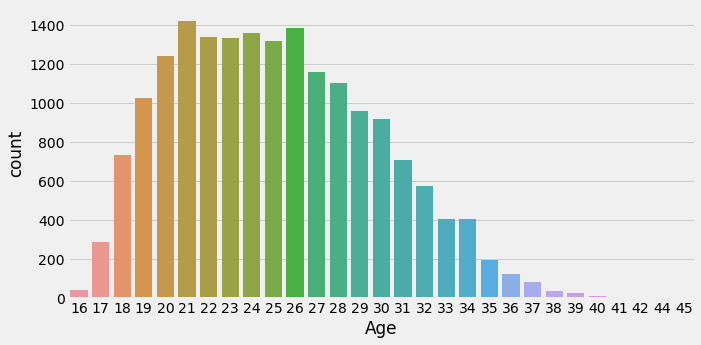

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(data['Age'])
#sns.countplot(data['Nationality'],hue='Release Clause',data=data)

### Find the Most Expensive Players whose contracts are going to Expire Soon

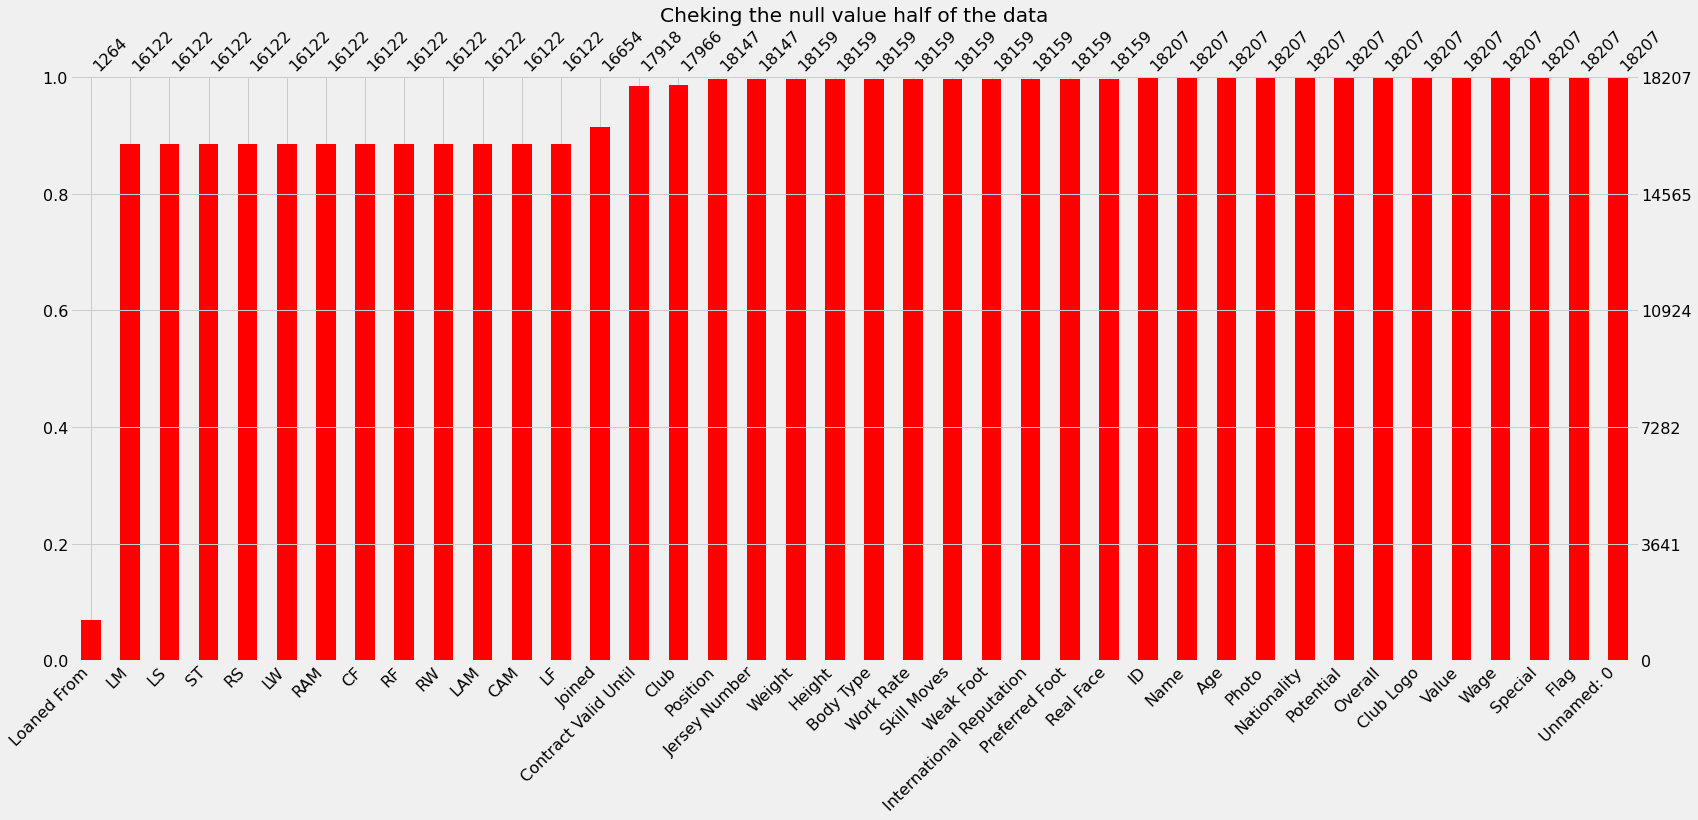

In [10]:
# Checking if the data on any null value
# visualize missing values matric
mno.bar(data.iloc[:,:40],color='red',sort='ascending')
plt.title("Cheking the null value half of the data")
plt.show()

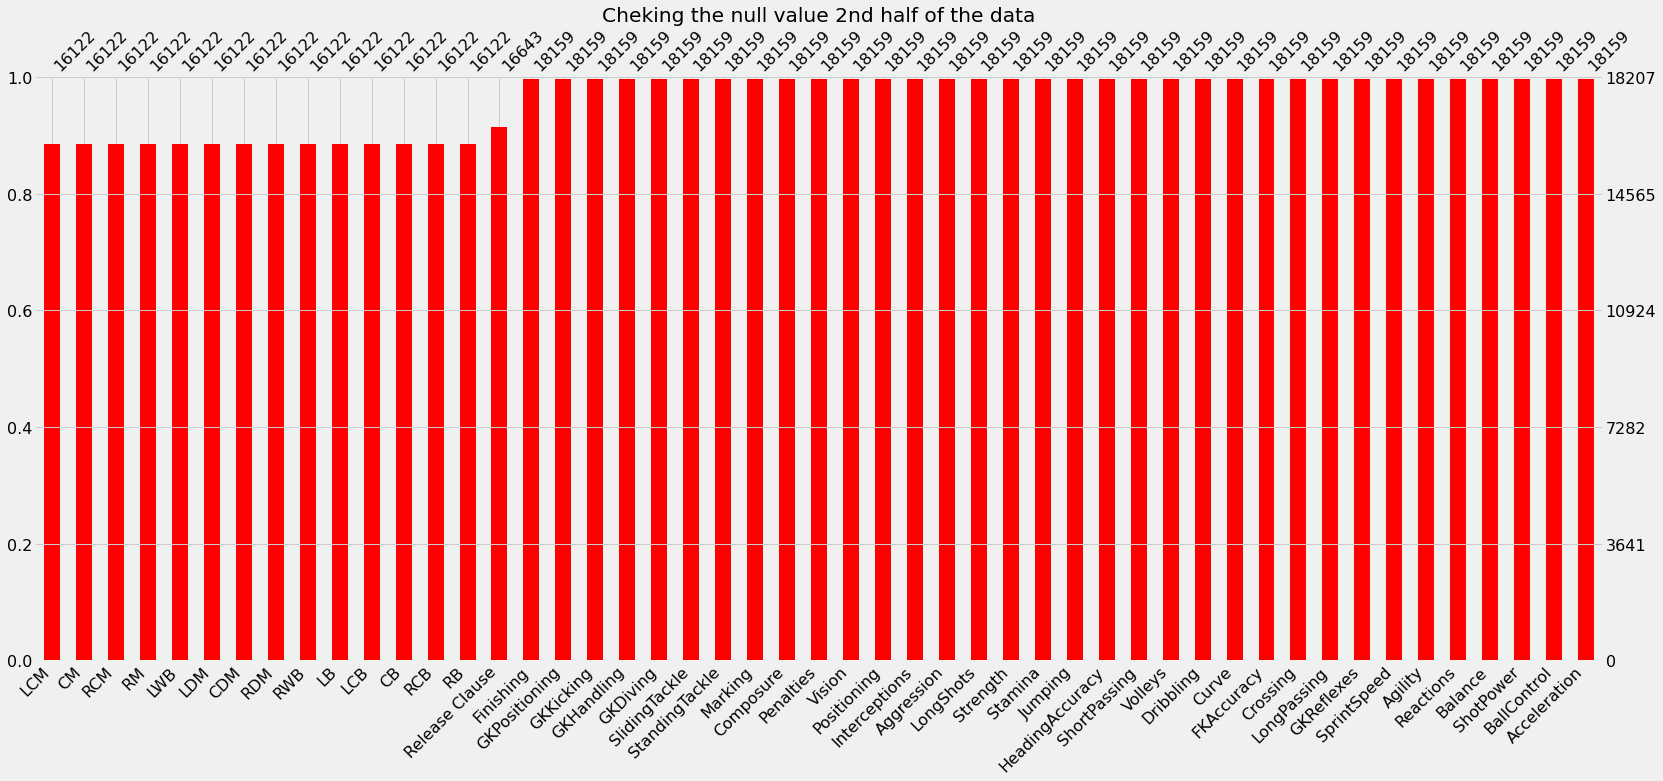

In [11]:
mno.bar(data.iloc[:,40:],color='red',sort='ascending')
plt.title("Cheking the null value 2nd half of the data")
plt.show()

In [12]:
# feeling the missing Bellevue for the continued value goals for proper data visualization
data['ShortPassing'].fillna(data['ShortPassing'].mean(),inplace=True)
data['Volleys'].fillna(data['Volleys'].mean(),inplace=True)
data['Dribbling'].fillna(data['Dribbling'].mean(),inplace=True)
data['Curve'].fillna(data['Curve'].mean(),inplace=True)
data['FKAccuracy'].fillna(data['FKAccuracy'].mean(),inplace=True)
data['LongPassing'].fillna(data['LongPassing'].mean(),inplace=True)
data['BallControl'].fillna(data['BallControl'].mean(),inplace=True)
data['HeadingAccuracy'].fillna(data['HeadingAccuracy'].mean(),inplace=True)
data['Finishing'].fillna(data['Finishing'].mean(),inplace=True)
data['Weight'].fillna('200lbs',inplace=True)
data['Contract Valid Until'].fillna(2019,inplace=True)
data['Height'].fillna("5'11",inplace=True)
data['Loaned From'].fillna('None',inplace=True)
data['Joined'].fillna('Jul 1,2018',inplace=True)     
data['Jersey Number'].fillna(8,inplace=True)
data['Body Type'].fillna('Normal',inplace=True)
data['Position'].fillna('ST',inplace=True)
data['Club'].fillna('No Club',inplace=True)
data['Work Rate'].fillna('Medium/Medium',inplace=True)
data['Skill Moves'].fillna(data['Skill Moves'].median(),inplace=True)
data['Weak Foot'].fillna(3,inplace=True)
data['Preferred Foot'].fillna('Right',inplace=True)     
data['International Reputation'].fillna(1,inplace=True)     
data['Wage'].fillna('200k',inplace=True)
data.fillna(0,inplace=True)



In [13]:
#data['Loaned From'].fillna('.sum',inplace=True)
data['Weight'].isna().sum()

0

In [14]:
# ###Feature engineering
# Feature engineering is the process of using domain knowledge to extract features from raw data via data mining techniques.

# Good features allow you to represent the underlying structure of the data in the most accurate manner.

# Features can be used to improve the performance of machine learning algorithms. Feature engineering can be considered as machine learning itself.

# Ways to perform Feature Engineering: -

# Aggregating the features
# Binning the features
# Extracting Information from the features
# Defending Feature: -

# Averaging the values from marking
# Standing tackle
# Sliding tackle option
# General Feature: -

# HeadingAccuracy
# Dribbling
# Curve
# Ballcontrol
# Types of Features: -

# Mental Feature which return the average of aggression, interceptions, positioning, vision and composure values.
# Passing Feature would return the Mean of Crossing, Shortpassing and Longpassing Values.
# Acceleration, spritnspeed , agility and reactions defines the mobility of an individual
# Balance, jumping , stamina and strength are the power features.
# Rating function will return the mean of these values.
# Shooting feature will help you conclude the shooting ability of a player.
# Shooting Attributes: -

# Finishing
# Volleys
# Fkaccuracy
# Shotpower
# Longshots
# Penalties

# Adding Features to the Dataset: -

# Had already created the function to make new features.
# Adding Features by using apply function.
# Checking the column using the command data.columns.

# In the next Video, you are going to learn about Data Visualization.



### Feature Engineering

In [15]:
#Creating new features by aggregating the features
#def defending(data):
#    return int(round((data[['Marking','StandingTackle','SlidingTackle']].mean()).mean()))

#def general(data):
#    return int(round((data[['HeadingAccuracy','Dribbling','Curve']].mean()).mean()))

#def mental(data):
#    return int(round((data[['Aggression','Interceptions','Positioning','Vision','Composure']].mean()).mean()))

#def passing(data):
#    return int(round((data[['Crossing','ShortPassing','LongPassing']].mean()).mean()))

#def mobility(data):
#    return int(round((data[['Acceleration','SprintSpeed','Agility','Reactions']].mean()).mean()))

#def power(data):
#    return int(round((data[['Balance','Jumping','Stamina','Strength']].mean()).mean()))

#def rating(data):
#    return int(round((data[['Potential','Overall']].mean()).mean()))

#def shooting(data):
#    return int(round((data[['Finishing','Volleys','FKAccuracy','ShotPower','LomgShots','Penalties']].mean()).mean()))


### Adding thses categories to the data

In [16]:
#data['Defending']=data.apply(defending, axis=1)
#data['General']=data.apply(general, axis=1)
#data['Mental']=data.apply(mental, axis=1)
#data['Passing']=data.apply(passing, axis=1)
#data['Mobility']=data.apply(mobility, axis=1)
#data['Power']=data.apply(power, axis=1)
#data['Rating']=data.apply(rating, axis=1)
#data['Shooting']=data.apply(shooting, axis=1)



# let's check the column names in the data after reading new features
#%time(data.columns)

In [17]:
#data['Defending']=data.apply(defending,axis=1)

In [18]:
# new one
#def defending(data):
#    return (round(data[[ 'Marking', 'StandingTackle','SlidingTackle']].mean()).mean())

#def general(data):
#    return round((data[['HeadingAccuracy','Dribbling','Curve','BallControl']].mean()).mean())

#def mental(data):
#    return round((data[['Aggression','Interceptions','Positioning','Vision','Composure']].mean()). mean())
                
#def passing (data):
#    return round((data[[ 'Crossing', 'ShortPassing','LongPassing']].mean()).mean())

#def mobility(data):
#    return round((data[["Acceleration", "SprintSpeed","Agility","Reactions"]].mean()).mean())

#def power (data):
#    return round((data[['Balance','Jumping','Stamina','Strength']].mean()).mean())

#def rating(data): 
#    return round((data[['Potential','Overall']].mean()). mean())
 
#def shooting (data):
#    return round((data[['Finishing','Volleys','FKAccuracy','ShotPower','LongShots','Penalties']].mean()).mean())

In [19]:
#data['Defending']=data.apply(defending, axis=1)
#data['General']=data.apply(general, axis=1)
#data['Mental']=data.apply(mental, axis=1)
#data['Passing']=data.apply(passing, axis=1)
#data['Mobility']=data.apply(mobility, axis=1)
#data['Power']=data.apply(power, axis=1)
#data['Rating']=data.apply(rating, axis=1)
#data['Shooting']=data.apply(shooting, axis=1)

#defending(data)

In [20]:
Defending=lambda x: (round(data[[ 'Marking', 'StandingTackle','SlidingTackle']].mean()).mean())
General=lambda x: round((data[['HeadingAccuracy','Dribbling','Curve','BallControl']].mean()).mean())
Mental=lambda x: round((data[['Aggression','Interceptions','Positioning','Vision','Composure']].mean()). mean())
Passing=lambda x: round((data[[ 'Crossing', 'ShortPassing','LongPassing']].mean()).mean())
Mobility=lambda x: round((data[["Acceleration", "SprintSpeed","Agility","Reactions"]].mean()).mean())
Power=lambda x: round((data[['Balance','Jumping','Stamina','Strength']].mean()).mean())
Rating= lambda x: round((data[['Potential','Overall']].mean()). mean())
Shooting= lambda x: round((data[['Finishing','Volleys','FKAccuracy','ShotPower','LongShots','Penalties']].mean()).mean())


In [21]:

data['Defending']=data.apply(Defending, axis=1)
data['General']=data.apply(General, axis=1)
data['Mental']=data.apply(Mental, axis=1)
data['Passing']=data.apply(Passing, axis=1)
data['Mobility']=data.apply(Mobility, axis=1)
data['Power']=data.apply(Power, axis=1)
data['Rating']=data.apply(Rating, axis=1)
data['Shooting']=data.apply(Shooting, axis=1)

In [22]:
data['Defending']

0        47.0
1        47.0
2        47.0
3        47.0
4        47.0
         ... 
18202    47.0
18203    47.0
18204    47.0
18205    47.0
18206    47.0
Name: Defending, Length: 18207, dtype: float64

In [23]:
data.SlidingTackle
#round(data[[ 'Marking', 'StandingTackle','SlidingTackle']].mean()).mean()
print('all attributes score',round(data[[ 'Marking', 'StandingTackle','SlidingTackle']].mean()).mean())
print(round(data[[ 'Marking', 'StandingTackle','SlidingTackle']].mean()))

all attributes score 47.0
Marking           47.0
StandingTackle    48.0
SlidingTackle     46.0
dtype: float64


In [24]:
# def defending(data):
#     return int(round((data[['Marking','StandingTackle','SlidingTackle']].mean()).mean()))
# print("defending",defending(data))
# def general(data):
#     return int(round((data[['HeadingAccuracy','Dribbling','Curve']].mean()).mean()))
# print("general",general(data))
# def mental(data):
#     return int(round((data[['Aggression','Interceptions','Positioning','Vision','Composure']].mean()).mean()))
# print("mental",mental(data))
# def passing(data):
#     return int(round((data[['Crossing','ShortPassing','LongPassing']].mean()).mean()))
# print("passing",passing(data))
# def mobility(data):
#     return int(round((data[['Acceleration','SprintSpeed','Agility','Reactions']].mean()).mean()))
# print("mobility",mobility(data))
# def power(data):
#     return int(round((data[['Balance','Jumping','Stamina','Strength']].mean()).mean()))
# print('power',power(data))
# def rating(data):
#     return int(round((data[['Potential','Overall']].mean()).mean()))
# print("rating",rating(data))
# def shooting(data):
#     return int(round((data[['Finishing','Volleys','FKAccuracy','ShotPower','LongShots','Penalties']].mean()).mean()))
# print("shooting",shooting(data))



In [25]:
# defending=47  #to comment down the entire block (ctrl+/)
# general=52
# mental=53
# passing=54
# mobility=64
# power=64
# rating=69
# shooting=47

# data['Defending']=defending
# data['General']=general
# data['Mental']=mental
# data['Passing']=passing
# data['Mobility']=mobility
# data['Power']=power
# data['Rating']=rating
# data['Shooting']=shooting

In [26]:
data.iloc[:,80:].isna().sum()
#data.info()

Marking           0
StandingTackle    0
SlidingTackle     0
GKDiving          0
GKHandling        0
GKKicking         0
GKPositioning     0
GKReflexes        0
Release Clause    0
Defending         0
General           0
Mental            0
Passing           0
Mobility          0
Power             0
Rating            0
Shooting          0
dtype: int64

### Data Visualization

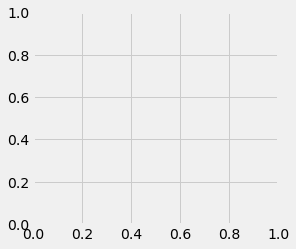

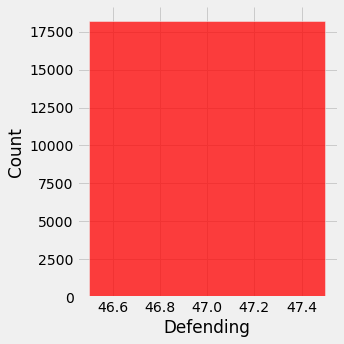

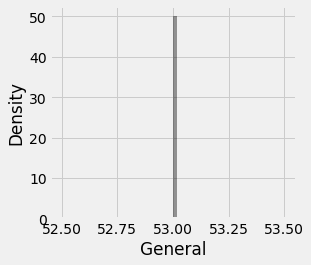

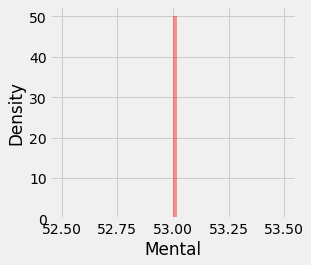

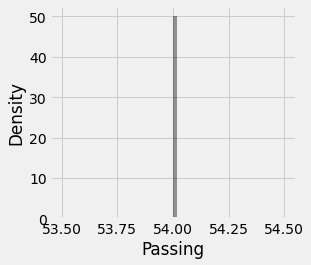

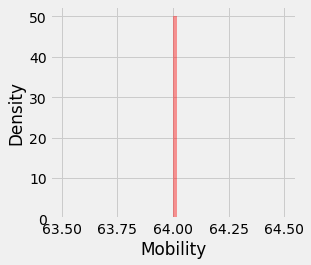

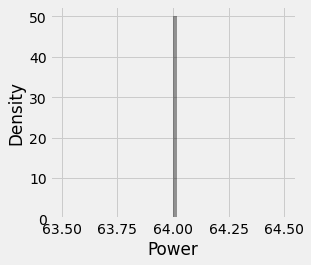

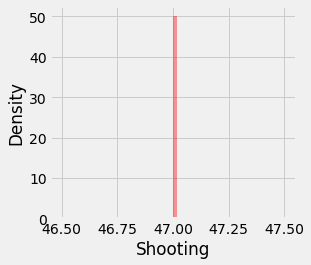

In [28]:
# Lets check the Distribution of Scores of Different Skills plt.rcParams[ figure.figsize] (18, 8)
plt.rcParams['figure.figsize']=(18,8)

plt.subplot(2, 4, 1)
sns.displot(data['Defending'], color = 'red')
plt.show()

plt.subplot(2, 4, 2)
sns.distplot(data['General'], color ='black')
plt.show()

plt.subplot(2, 4, 3)
sns.distplot(data['Mental'], color ="red") 
plt.show()

plt.subplot(2, 4, 4)
sns.distplot(data['Passing'], color ="black")
plt.show()

plt.subplot(2, 4, 5)
sns.distplot(data['Mobility'], color = "red")
plt.show()

plt.subplot(2, 4, 6)
sns.distplot(data['Power'], color = 'black') 
plt.show()

plt.subplot(2, 4, 7) 
sns.distplot(data['Shooting'], color = "red")
plt.show()

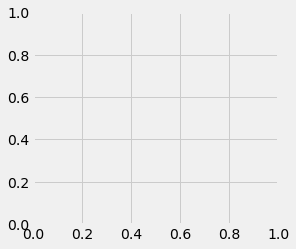

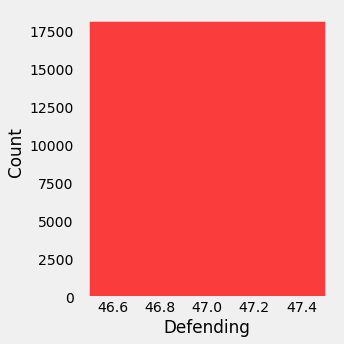

In [29]:
#plt.rcParams['figure.figsize']=(18,8)

plt.subplot(2, 4, 1)
sns.displot(data['Defending'], color = 'red')
plt.grid()

In [30]:
# data.iloc[3:,80:].describe()
data.iloc[:,80:]

,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting
0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,47.0,53,53,54,64,64,69,47
1,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,47.0,53,53,54,64,64,69,47
2,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,47.0,53,53,54,64,64,69,47
3,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,47.0,53,53,54,64,64,69,47
4,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,47.0,53,53,54,64,64,69,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K,47.0,53,53,54,64,64,69,47
18203,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K,47.0,53,53,54,64,64,69,47
18204,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K,47.0,53,53,54,64,64,69,47
18205,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K,47.0,53,53,54,64,64,69,47


In [31]:
data['Marking']

0        33.0
1        28.0
2        27.0
3        15.0
4        68.0
         ... 
18202    40.0
18203    22.0
18204    32.0
18205    20.0
18206    40.0
Name: Marking, Length: 18207, dtype: float64

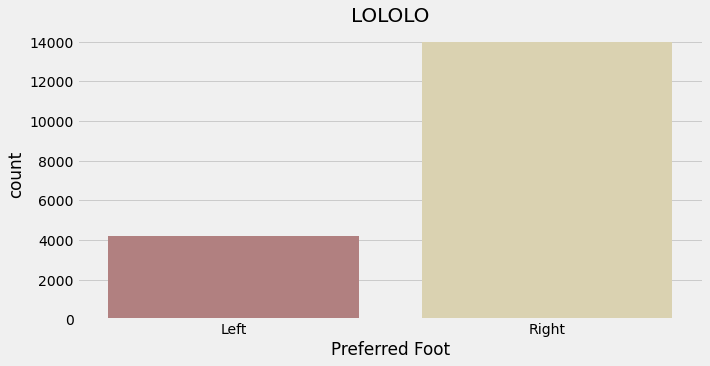

In [32]:
# Comparison between preferred foot or players
plt.rcParams['figure.figsize']=(10,5)
sns.countplot(data['Preferred Foot'],palette="pink")
plt.title("LOLOLO",fontsize=20)
plt.show()

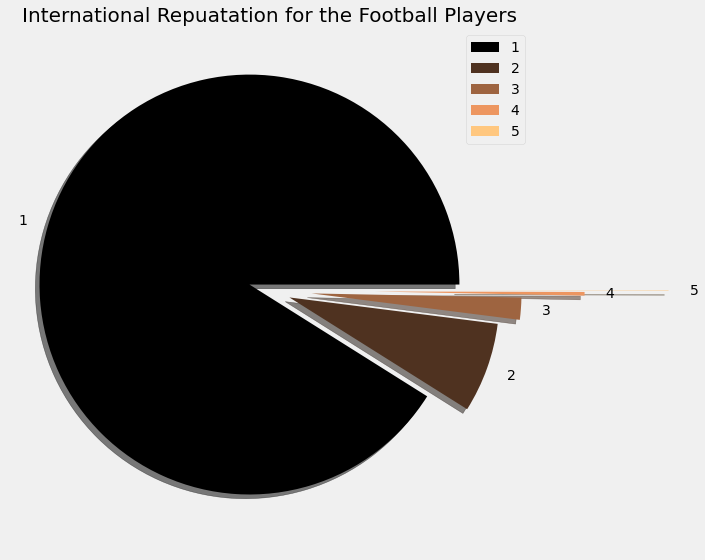

In [33]:
#plotting a pie chart to represent share of international reputation

labels= ['1', '2', '3', '4', '5']

sizes= data['International Reputation'].value_counts()

colors=plt.cm.copper(np.linspace (0, 1, 5))

explode =[0.1, 0.1, 0.2, 0.5, 0.9]

plt.rcParams['figure.figsize'] = (9, 9)

plt.pie(sizes, labels=labels, colors =colors, explode=explode, shadow = True)
plt.title('International Repuatation for the Football Players', fontsize = 20)

plt.legend()

1.0    16580
2.0     1261
3.0      309
4.0       51
5.0        6
Name: International Reputation, dtype: int64

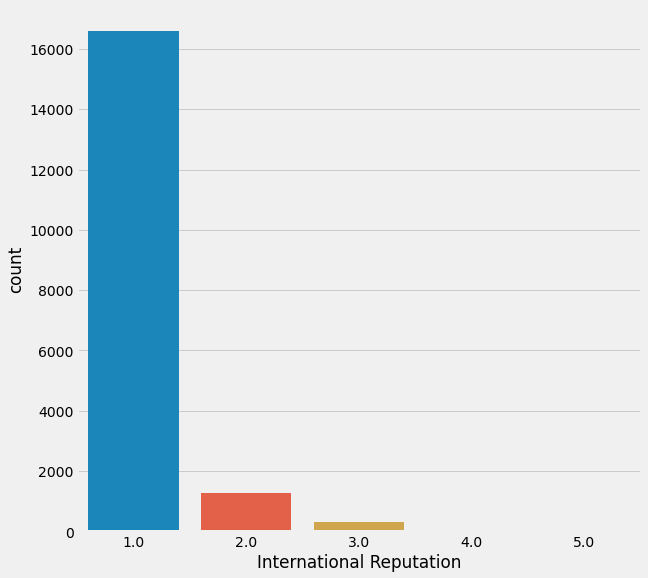

In [34]:
data['International Reputation'].value_counts()
sns.countplot(data['International Reputation'])
data['International Reputation'].value_counts()

In [35]:
# #data['International Reputation']
# #data.iloc[:]>data['International Reputation']
# # Select rows where sample_col1 is 1
# print(data.loc[data['International Reputation'] == 5.0])
# data.loc[data['International Reputation'] == 5.0]
# #to get the specific value interms of row 
data['International Reputation'] == 5.0
data[data['International Reputation'] == 5.0]

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,GKReflexes,Release Clause,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,8.0,€226.5M,47.0,53,53,54,64,64,69,47
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,11.0,€127.1M,47.0,53,53,54,64,64,69,47
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,11.0,€228.1M,47.0,53,53,54,64,64,69,47
7,7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,...,37.0,€164M,47.0,53,53,54,64,64,69,47
22,22,167495,M. Neuer,32,https://cdn.sofifa.org/players/4/19/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,89,89,FC Bayern München,...,87.0,€62.7M,47.0,53,53,54,64,64,69,47
109,109,41236,Z. Ibrahimović,36,https://cdn.sofifa.org/players/4/19/41236.png,Sweden,https://cdn.sofifa.org/flags/46.png,85,85,LA Galaxy,...,12.0,€21M,47.0,53,53,54,64,64,69,47


In [36]:
print(data[data['International Reputation'] == 5.0] [['Name','Nationality','Overall']])
print("------------------------------------------------------")
print(data[data['International Reputation'] == 5.0] [['Name','Nationality','Overall']].sort_values(by='Overall'))
print("------------------------------------------------------")
#data[data['International Reputation'] == 5.0] [['Name','Nationality','Overall']].sort_values(by='Overall',ascending = False).style.background_gradiant(cmap='magma')

                  


                  Name Nationality  Overall
0             L. Messi   Argentina       94
1    Cristiano Ronaldo    Portugal       94
2            Neymar Jr      Brazil       92
7            L. Suárez     Uruguay       91
22            M. Neuer     Germany       89
109     Z. Ibrahimović      Sweden       85
------------------------------------------------------
                  Name Nationality  Overall
109     Z. Ibrahimović      Sweden       85
22            M. Neuer     Germany       89
7            L. Suárez     Uruguay       91
2            Neymar Jr      Brazil       92
0             L. Messi   Argentina       94
1    Cristiano Ronaldo    Portugal       94
------------------------------------------------------


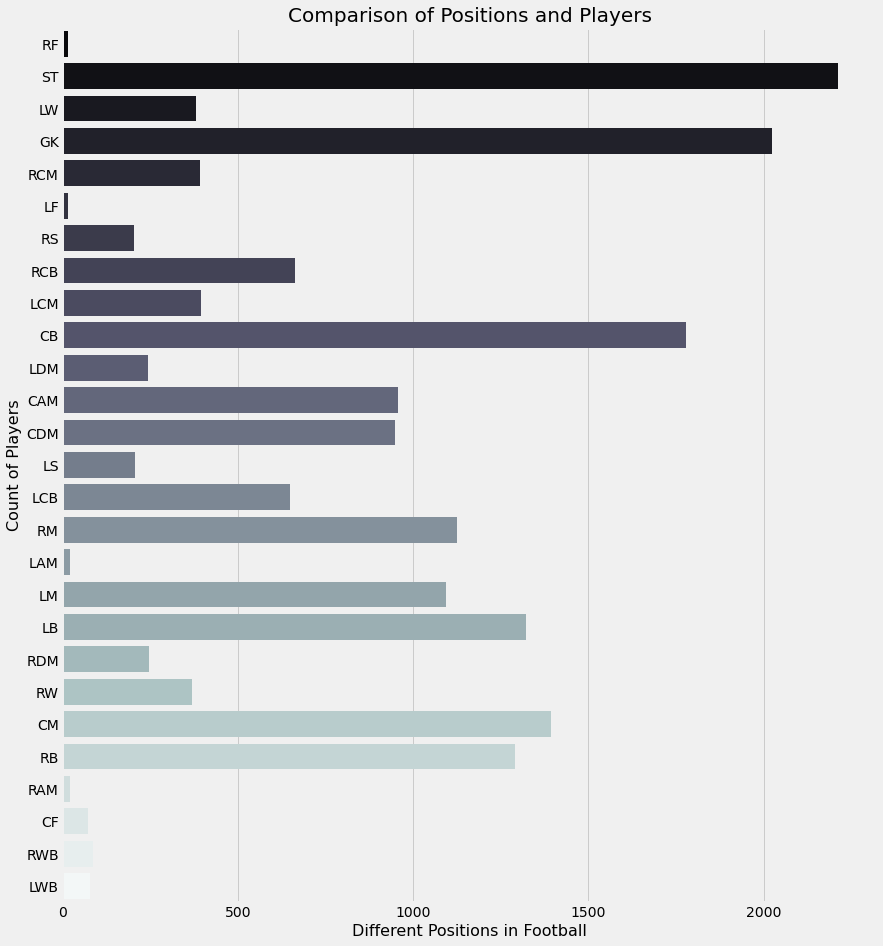

In [37]:
#different positions acquired by players
# different positions acquired by the players

plt.figure(figsize =(13, 15)) 

plt.style.use('fivethirtyeight')

ax = sns.countplot(y = 'Position', data = data, palette = "bone")

ax.set_xlabel(xlabel = 'Different Positions in Football' , fontsize = 16)

ax.set_ylabel(ylabel = 'Count of Players', fontsize = 16)

ax.set_title(label = 'Comparison of Positions and Players', fontsize = 20)
plt.show()


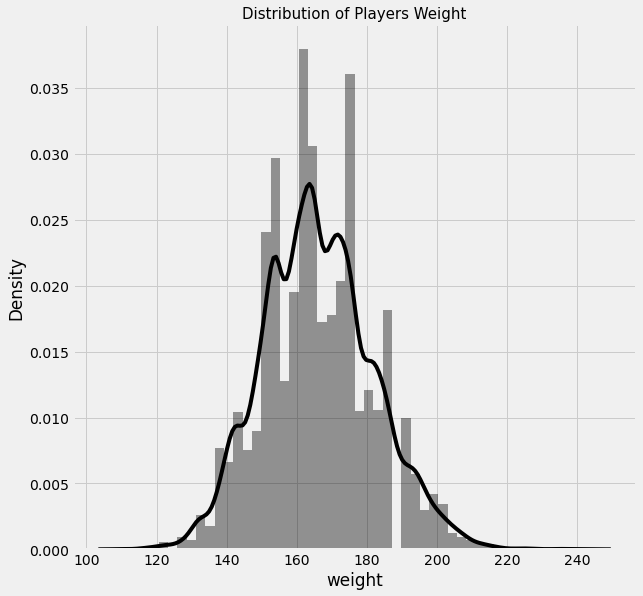

In [38]:
#defining a function for cleaning the weight data
#value=data['Weight'].to_list()
def extract_value_from(value): 
    out=value.replace("lbs","")
    return float(out)

#applying the function to weight column 
data["weight"] = data['Weight'].apply(lambda x: extract_value_from(x))

#plotting the distribution of weight of the players
sns.distplot(data['weight'], color="black") 
plt.title("Distribution of Players Weight", fontsize = 15)
plt.show()

In [39]:
#data['Weight'].to_list()
data['Wage']

0        €565K
1        €405K
2        €290K
3        €260K
4        €355K
         ...  
18202      €1K
18203      €1K
18204      €1K
18205      €1K
18206      €1K
Name: Wage, Length: 18207, dtype: object

In [40]:
# defining a fuc to clean the wage of the players
# convert into pounds dollar to nothing and converting the millions to millions and cash to pay
def extract_value_from(column):
    out=column.replace('€','')
    if 'M' in out:
        out = float(out.replace("M",''))*1000000
    elif 'K' in column:
        out=float(out.replace('K',''))*1000
    return float(out)

# Wage Object Splitting

ValueError: could not convert string to float: '€110.5M'

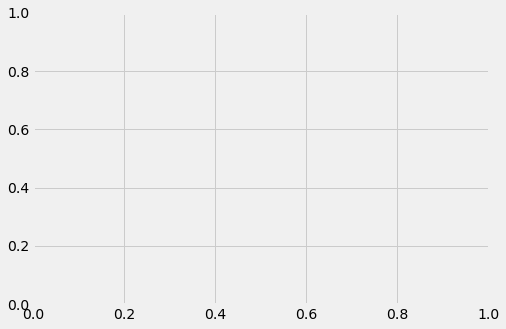

In [41]:
# applying the function to the wage and value column
# data['Wage'].apply(lambda x:extract_value_from(x))

data['value'] = data['Value'].apply(lambda x: extract_value_from(x))
data['Wage'] = data['Wage'].apply(lambda x: extract_value_from(x))


#visualizing the data

plt.rcParams['figure.figsize']= (16, 5)

plt.subplot(1, 2, 1)
sns.distplot(data['Value'], color='violet')
plt.title('Distribution of value of the Players', fontsize=15)

plt.subplot(1, 2, 2)
sns.distplot(data['Wage'], color ='purple')

plt.title('Distribution of Hages of the Players', fontsize =15)
plt.show()

In [ ]:
data.Wage.replace('K',' ')

In [ ]:
data.Wage

In [ ]:
#SKILL Moves of Players
plt.figure(figsize = (10, 6))

ax=sns.countplot(x= 'Skill Moves', data=data, palette='pastel') 
ax.set_title(label='Count of players on Basis of their skill moves', fontsize=20)


ax.set_xlabel(xlabel='Number of Skill Moves', fontsize=16) 
ax.set_ylabel(ylabel='Count', fontsize=16)
plt.show()

In [ ]:
# plotting a pie chart to represent the shore of week foot players
plt.figure(figsize=(18,8))

labels= ['5', '4', '3', '2', '1']
size=data['Weak Foot'].value_counts()

colors=plt.cm.Wistia(np.linspace(0, 1, 5))

explode =[0, 0, 0, 0, 0.1]

plt.pie(size, labels=labels, colors=colors, explode=explode, shadow=True, startangle=90) 
plt.title('Distribution of Week Foot among Players', fontsize= 25)
plt.legend()
plt.show()

In [ ]:
# To show Different work rate of the players participating in the FIFA 2019 
plt.figure(figsize =(15, 5)) 
plt.style.use('fivethirtyeight')

plt.title('Different work rates of the Players Participating in the FIFA 2019', fontsize = 28)

sns.countplot(x = 'Work Rate', data = data, palette = 'hls') 
plt.xlabel('Work rates associated with the players', fontsize = 16) 
plt.xticks(rotation =90)
plt.ylabel('count of Players', fontsize= 16)
plt.show()

# # To show Different potential scores of the players participating in the FIFA 2019


In [ ]:
# To show Different potential scores of the players participating in the FIFA 2019
plt.figure(figsize =(16, 4)) 
plt.style.use('seaborn-paper')


plt.subplot(1, 2, 1)
x=data.Potential
ax = sns.distplot(x, bins=58, kde=False, color= 'y')
ax.set_xlabel(xlabel = "Player's Potential Scores", fontsize=10) 
ax.set_ylabel(ylabel= 'Number of players', fontsize=10)
ax.set_title(label='Histogram of players Potential Scores', fontsize = 15)

plt.subplot(1, 2, 2)
y=data.Overall
ax= sns.distplot(y, bins =58, kde =False, color = 'y')
ax.set_xlabel(xlabel ="Player's Overall Scores", fontsize =10) 
ax.set_ylabel(ylabel ='Number of players', fontsize = 10)
ax.set_title(label ='Histogram of players Overall Scores', fontsize= 15)
plt.show()

# violine plot

In [ ]:
#violine plot

plt.rcParams['figure.figsize'] = (28, 7) 
plt.style.use('seaborn-dark-palette')

sns.boxplot(data['Overall'], data['Age'], hue = data['Preferred Foot'], palette = "Greys")
plt.title('Comparison of Overall Scores and age unt Preferred foot', fontsize=15)
plt.show()

# Countries with most player

In [ ]:
# picking up the countries with highest number of players to compare their overall scores 
data['Nationality'].value_counts().head (10).plot(kind='pie', cmap='inferno', startangle= 90, explode= [0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0])
plt.title('Countries having Highest Number of players', fontsize = 15)

plt.axis('off')
plt.show()

In [ ]:
 #Every Nations' Player and their weights
some_countries= ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_countries= data.loc[data['Nationality'].isin(some_countries) & data['Overall']]

plt.rcParams['figure.figsize']= (15, 7)
ax =sns.barplot(x= data_countries['Nationality'],y= data_countries['Overall'], palette= "Accent")
ax.set_xlabel(xlabel ='Countries', fontsize =9)

ax.set_ylabel(ylabel='Overall', fontsize=9)
ax.set_title(label ='Distribution of Overall of players from different countries', fontsize=28)
plt.show
# sns.barplot(x=categorical value ,y= numeric value)

In [ ]:
data.Nationality
new=data['Weight'].replace('lbs','')
print(new)

In [ ]:
# data_countries['Nationality'].value_counts()
# sns.barplot(X=data_countries['Nationality'],y= data['Weight'])

In [ ]:
def extract_value_from1(column):
    out=column.replace('lbs','')
    return round(out)
#     if 'M' in out:
#         out = float(out.replace("M",''))*1000000
#     elif 'K' in column:
#         out=float(out.replace('K',''))*1000
  


In [ ]:
# data['Weight']=data['Weight'].apply(lambda x:extract_value_from1(x))
# #data['Wage'] = data['Wage'].apply(lambda x: extract_value_from(x))


In [ ]:
def extract_value_from1(Y):
    out=Y.str.replace('lbs','')
    return (out)

In [ ]:
# data['Weight']=data['Weight'].apply(lambda x:extract_value_from1(x) )

num=data['Weight'].tolist
num

In [ ]:
data[['N_weight','org']] = data.Weight.str.split("lb",expand=True)
print(data['N_weight'])
#splittint the data of weight=100lbs to 100 and org =lbs
#print(data['org'])
data['N_weight'].info()

In [ ]:
data.columns
data['N_weight'].isna().sum()
data['N_weight'].fillna(value=0)
print(data['N_weight'].dtype)
data['N_weight']=data['N_weight'].astype(float)
print(data['N_weight'])

sns.barplot(x=data['Nationality'],y=data['N_weight'])

In [ ]:
 #Every Nations' Player and their weights
some_countries= ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_countries= data.loc[data['Nationality'].isin(some_countries) & data['N_weight']]

plt.rcParams['figure.figsize']= (15, 7)
ax =sns.barplot(x= data_countries['Nationality'],y= data_countries['N_weight'], palette= "Accent")
ax.set_xlabel(xlabel ='Countries', fontsize =9)

ax.set_ylabel(ylabel='Weignt', fontsize=9)
ax.set_title(label ='Distribution of Weight of players from different countries', fontsize=28)
plt.show
# sns.barplot(x=categorical value ,y= numeric value)

In [ ]:
 #Every Nations' Player and their weights
some_countries= ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_countries= data.loc[data['Nationality'].isin(some_countries) & data['Wage']]

plt.rcParams['figure.figsize']= (15, 7)
ax =sns.barplot(x= data_countries['Nationality'],y= data_countries['Wage'], palette= "Accent")
ax.set_xlabel(xlabel ='Countries', fontsize =9)

ax.set_ylabel(ylabel='Overall', fontsize=9)
ax.set_title(label ='Distribution of Wage of players from different countries', fontsize=28)
plt.show
# sns.barplot(x=categorical value ,y= numeric value)

In [ ]:
# data[["wage1","orf"]]=data.Wage.str.split("k",expand=True)
# #data[['N_weight','org']] = data.Weight.str.split("lb",expand=True)
data.Wage.dtype

In [ ]:
 #Every Nations' Player and their weights
some_countries= ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_countries= data.loc[data['Nationality'].isin(some_countries) & data['Wage']]

plt.rcParams['figure.figsize']= (15, 7)
ax =sns.barplot(x= data_countries['Nationality'],y= data_countries['Wage'], palette= "Purples")
ax.set_xlabel(xlabel ='Countries', fontsize =9)

ax.set_ylabel(ylabel='Overall', fontsize=9)
ax.set_title(label ='Distribution of Wage of players from different countries', fontsize=28)
plt.show
# sns.barplot(x=categorical value ,y= numeric value)

#  Every Nations' Player and their international reputation


In [ ]:
 #Every Nations' Player and their international reputation
some_countries= ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_countries= data.loc[data['Nationality'].isin(some_countries) & data['International Reputation']]

plt.rcParams['figure.figsize']= (15, 7)
ax =sns.boxenplot(x= data_countries['Nationality'],y= data_countries['International Reputation'], palette= "autumn")
ax.set_xlabel(xlabel ='Countries', fontsize =9)

ax.set_ylabel(ylabel='Overall', fontsize=9)
ax.set_title(label ='Distribution of International Reputation of players from different countries', fontsize=28)
plt.show
# sns.barplot(x=categorical value ,y= numeric value)

In [ ]:
some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf'
              ,'Manchestar City','Tottenham Hotspur','FC Barcelona','Valencia CF','Chelsea','Real Madrid')

data_clubs = data.loc[data['Club'].isin (some_clubs) & data['Overall']]
plt.rcParams['figure.figsize'] = (15, 8)
ax= sns.boxplot (x = data_clubs ['Club'], y = data_clubs [ 'Overall'], palette = 'inferno')
ax.set_xlabel(xlabel = 'Some Popular Clubs', fontsize = 9) 
ax.set_ylabel(ylabel = 'Overall Score', fontsize = 9)
ax.set_title(label = 'Distribution of Overall Score in Different popular Clubs', fontsize = 20)
plt.xticks(rotation = 98)

plt.grid()
plt.show()

# Distribution of ages in some popular club

In [ ]:
some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf'
              ,'Manchestar City','Tottenham Hotspur','FC Barcelona','Valencia CF','Chelsea','Real Madrid')

data_clubs = data.loc[data['Club'].isin (some_clubs) & data['Age']]
plt.rcParams['figure.figsize'] = (15, 8)
ax= sns.boxenplot (x = data_clubs ['Club'], y = data_clubs [ 'Age'], palette = 'magma')
ax.set_xlabel(xlabel = 'Some Popular Clubs', fontsize = 10)
ax.set_ylabel(ylabel = 'Overall Score', fontsize = 10)
ax.set_title(label = 'Distribution of AGE in Different popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)

plt.grid()
plt.show()

In [ ]:
#anotherone
some_clubs= ('CD Leganés', 'Southampton','RC Celta', 'Empoli', 
             'Fortuna Düsseldorf', 'Ranchestar City', 'Tottenham Hotspur','FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

data_club =data.loc[data['Club'].isin(some_clubs) & data["Age"]]

plt.rcParams['figure.figsize']= (15, 8) 
ax= sns.boxenplot(x= 'Club', y= 'Age', data= data_club, palette ='magma')

ax.set_xlabel(xlabel =' Names of some popular Clubs', fontsize= 10) 
ax.set_ylabel(ylabel= 'Distribution', fontsize= 10)

ax.set_title(label ="Disstribution of Ages in some Popular Clubs", fontsize=20)

plt.xticks(rotation = 90)

plt.grid()

In [ ]:
#anotherone
some_clubs= ('CD Leganés', 'Southampton','RC Celta', 'Empoli', 
             'Fortuna Düsseldorf', 'Ranchestar City', 'Tottenham Hotspur','FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

data_club =data.loc[data['Club'].isin(some_clubs) & data["Wage"]]

plt.rcParams['figure.figsize']= (15, 8) 
ax= sns.boxplot(x= 'Club', y= 'Wage', data= data_club, palette ='magma')

ax.set_xlabel(xlabel =' Names of some popular Clubs', fontsize= 10) 
ax.set_ylabel(ylabel= 'Distribution', fontsize= 10)

ax.set_title(label ="Disstribution of Wages in some Popular Clubs", fontsize=20)

plt.xticks(rotation = 90)

plt.grid()

# International rputation

In [ ]:
#anotherone
some_clubs= ('CD Leganés', 'Southampton','RC Celta', 'Empoli', 
             'Fortuna Düsseldorf', 'Ranchestar City', 'Tottenham Hotspur','FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

data_club =data.loc[data['Club'].isin(some_clubs) & data["International Reputation"]]

plt.rcParams['figure.figsize']= (15, 8) 
ax= sns.boxenplot(x= 'Club', y= 'International Reputation', data= data_club, palette ='copper')

ax.set_xlabel(xlabel =' Names of some popular Clubs', fontsize= 10) 
ax.set_ylabel(ylabel= 'Distribution', fontsize= 10)

ax.set_title(label ="Disstribution of Ages in some Popular Clubs", fontsize=20)

plt.xticks(rotation = 90)

plt.grid()

In [ ]:
# comparing the performance of left-footed and right-footed footballers 
#ballcontrol vs dribbing

sns.lmplot(x='BallControl', y ='Dribbling', data=data, col ='Preferred Foot')
plt.show()


#                                     Query Analysis


# Best Players per each position with their age, club, and nationality based on their Overall Scores


In [57]:
 # best players per each position with their age, club, and nationality based on their overall scores
data.iloc[data.groupby(data['Position'])['Overall'].idxmax()][['Position', 'Name', 'Age', 'Club',
                                                               'Nationality', 'Overall']].sort_values(by= 'Overall',
                                                                             ascending=False).style.background_gradient(cmap='pink')

,Position,Name,Age,Club,Nationality,Overall
1,ST,Cristiano Ronaldo,33,Juventus,Portugal,94
0,RF,L. Messi,31,FC Barcelona,Argentina,94
2,LW,Neymar Jr,26,Paris Saint-Germain,Brazil,92
5,LF,E. Hazard,27,Chelsea,Belgium,91
7,RS,L. Suárez,31,FC Barcelona,Uruguay,91
4,RCM,K. De Bruyne,27,Manchester City,Belgium,91
3,GK,De Gea,27,Manchester United,Spain,91
8,RCB,Sergio Ramos,32,Real Madrid,Spain,91
12,CB,D. Godín,32,Atlético Madrid,Uruguay,90
11,LCM,T. Kroos,28,Real Madrid,Germany,90


# Best player for each skill

In [61]:
## Let's Analyze the Skills of Players
@interact
def skill(skills = ['Defending', 'General', 'Mental', 'Passing',
                    'Mobility', 'Power', 'Rating', 'Shooting'], score = 75):
    return data[data[skills] > score] [['Name', 'Nationality', 'Club', 'Overall', skills]].sort_values(by = skills,
                                            ascending = False).head (20).style.background_gradient (cmap ='Blues')

interactive(children=(Dropdown(description='skills', options=('Defending', 'General', 'Mental', 'Passing', 'Mo…

# lets make a function to get a Top 15 players from each country

In [62]:
# Lets make an interactive function for getting a report of the players country wise

#Lets make a function to see the List of top 15 players from each country

@interact

def country(country =list(data['Nationality'].value_counts().index)):
    return data[data['Nationality'] == country][[ 'Name', 'Position','Overall',
                                                 'Potential']].sort_values (by ='Overall', 
                                                            ascending= False).head(15).style.background_gradient(cmap='magma')

interactive(children=(Dropdown(description='country', options=('England', 'Germany', 'Spain', 'Argentina', 'Fr…

# lets make a function to get a Top 15 players from each Club

In [63]:
# Lets make on interactive function to get the List of top 15 players from each of the club

#lets define a function
@interact
def club(club =list(data['Club'].value_counts().index [1::])):
    return data[data["Club"]==club][["Name", "Jersey Number", "Position", "Overall","Nationality","Age","Wage",
                                     'Value','Contract Valid Until']].sort_values (by ='Overall'
                                                                                     , ascending= False).head(15).style.background_gradient(cmap="inferno")

interactive(children=(Dropdown(description='club', options=('FC Barcelona', 'Burnley', 'AS Monaco', 'Everton',…

# Youngest Players From thr FIFA  2013

In [64]:
#finding 15 youngest palyers from the dataset
youngest=data[data['Age']==16][['Name','Age','Club','Nationality','Overall']]
youngest.sort_values(by = 'Overall',ascending=False).head().style.background_gradient(cmap='magma')

,Name,Age,Club,Nationality,Overall
11457,W. Geubbels,16,AS Monaco,France,64
11732,A. Taoui,16,Toulouse Football Club,France,64
12496,Pelayo Morilla,16,Real Sporting de Gijón,Spain,63
12828,Guerrero,16,CF Rayo Majadahonda,Spain,63
13293,H. Massengo,16,AS Monaco,France,62


# 15 Eldest Players from FIFA 2019

In [65]:
#finding 15 eldest player

data.sort_values('Age',ascending=False)[['Name','Age',"Club"
                                        ,'Nationality','Overall']].head().style.background_gradient(cmap='winter')

,Name,Age,Club,Nationality,Overall
4741,O. Pérez,45,Pachuca,Mexico,71
18183,K. Pilkington,44,Cambridge United,England,48
17726,T. Warner,44,Accrington Stanley,Trinidad & Tobago,53
10545,S. Narazaki,42,Nagoya Grampus,Japan,65
7225,C. Muñoz,41,CD Universidad de Concepción,Argentina,68


# The longest membership in the CLUB

In [74]:
# The Longest membership in the club
now = datetime.datetime.now()
data['Join_year'] = data.Joined.dropna().map(lambda x: x.split(',')[1].split(' ')[1])
data['Years_of_member'] = (data.Join_year.dropna ().map(lambda x: now.year - int(x))).astype('int')
membership = data[['Name', 'Club', 'Years_of_member']].sort_values (by = 'Years_of_member', ascending = False).head(10)
membership.set_index('Name', inplace=True)
membership.style.background_gradient (cmap = 'Reds')

IndexError: list index out of range

In [70]:
import ipywidgets as widgets
from ipywidgets import interact
@interact
def check(column = 'Years_of_member',
club = ['FC Barcelona', 'Real Madrid', 'Chelsea'], membership = 4):
    return data[(data[column] > membership) & (data['Club'] == club) ][['Name','Club',
                                                                         'Years_of_member']].sort_values(by = 'Years_of_member',
                                                                                                          ascending = False).style.background_gradient(cmap='magma')

interactive(children=(Text(value='Years_of_member', description='column'), Dropdown(description='club', option…

# Defining the features of players

In [53]:
# defining the features of players
player_features = ('Acceleration', 'Aggression', 'Agility',
'Balance', 'BallControl', 'Composure',
'Crossing', 'Dribbling', 'FKAccuracy',
'Finishing', 'GKDiving', 'GKHandling',
'GKKicking', 'GKPositioning', 'GKReflexes',
'HeadingAccuracy', 'Interceptions', 'Jumping',
'LongPassing', 'LongShots', 'Marking', 'Penalties')


# Top four features for every position in football
for i, val in data.groupby (data['Position']) [player_features].mean().iterrows():
    print('Position (): {}, {}, {}'.format(i, *tuple(val.nlargest (4).index)))





Position (): CAM, Balance, Agility
Position (): CB, Jumping, Aggression
Position (): CDM, Aggression, Jumping
Position (): CF, Agility, Balance
Position (): CM, Balance, Agility
Position (): GK, GKReflexes, GKDiving
Position (): LAM, Agility, Balance
Position (): LB, Acceleration, Balance
Position (): LCB, Jumping, Aggression
Position (): LCM, Balance, Agility
Position (): LDM, Aggression, BallControl
Position (): LF, Balance, Agility
Position (): LM, Acceleration, Agility
Position (): LS, Acceleration, Agility
Position (): LW, Acceleration, Agility
Position (): LWB, Acceleration, Agility
Position (): RAM, Agility, Balance
Position (): RB, Acceleration, Balance
Position (): RCB, Jumping, Aggression
Position (): RCM, Agility, Balance
Position (): RDM, Aggression, Jumping
Position (): RF, Agility, Acceleration
Position (): RM, Acceleration, Agility
Position (): RS, Acceleration, Agility
Position (): RW, Acceleration, Agility
Position (): RWB, Acceleration, Agility
Position (): ST, Accele

# Top 10 left footed players

In [54]:
# Top 10 left footed footballers
data [data['Preferred Foot'] == 'Left'][['Name', 'Age', 'Club',
'Nationality', 'Overall']].sort_values (by = 'Overall',
ascending = False).head(10).style.background_gradient (cmap = 'bone')

,Name,Age,Club,Nationality,Overall
0,L. Messi,31,FC Barcelona,Argentina,94
13,David Silva,32,Manchester City,Spain,90
15,P. Dybala,24,Juventus,Argentina,89
17,A. Griezmann,27,Atlético Madrid,France,89
19,T. Courtois,26,Real Madrid,Belgium,89
24,G. Chiellini,33,Juventus,Italy,89
35,Marcelo,30,Real Madrid,Brazil,88
37,H. Lloris,31,Tottenham Hotspur,France,88
36,G. Bale,28,Real Madrid,Wales,88
28,J. Rodríguez,26,FC Bayern München,Colombia,88


# Top 10 Right footed players

In [56]:
# Top 10 Right footed footballers
data[data['Preferred Foot'] == 'Right'][['Name', 'Age', 'Club',
'Nationality', 'Overall']].sort_values (by = 'Overall',
ascending =False).head (10).style.background_gradient (cmap = 'copper')

,Name,Age,Club,Nationality,Overall
1,Cristiano Ronaldo,33,Juventus,Portugal,94
2,Neymar Jr,26,Paris Saint-Germain,Brazil,92
3,De Gea,27,Manchester United,Spain,91
4,K. De Bruyne,27,Manchester City,Belgium,91
5,E. Hazard,27,Chelsea,Belgium,91
6,L. Modrić,32,Real Madrid,Croatia,91
7,L. Suárez,31,FC Barcelona,Uruguay,91
8,Sergio Ramos,32,Real Madrid,Spain,91
9,J. Oblak,25,Atlético Madrid,Slovenia,90
10,R. Lewandowski,29,FC Bayern München,Poland,90
